<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha2_1_pandas%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# chaper2. 데이터 분석 맛보기
# 우리가 가장 많이 접하는 데이터의 형태는 엑셀(excel)의 스프레드 시트 같은 로우(row)와 칼럼(column)으로 구성된 테이블 형태
# pandas는 테이블 형태의 데이터를 쉽게 다룰 수 있는 파이썬 라이브러리.
# 라이브러리: 여러 함수를 모아 놓은 함수 보따리.

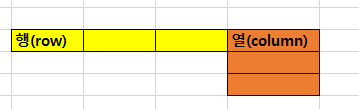

**데이터 불러오기**

In [3]:
# pandas 라이브러리 불러오기
import pandas as pd

# pandas.함수명(): pandas 안의 함수를 사용한다.
# as pd: pd라는 별명(alias)을 지정하면 pd.함수명()과 같은 형식으로 쓸 수 있습니다.

In [4]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파이선 IDE로 불러올 경우
sample_1=pd.read_excel('./files/sample_1.xlsx',header=1, skipfooter=2, usecols='A:C')
# ./: 상대 경로 = 우리가 작성하고 있는 주피터 노트북 파일이 있는 폴더의 위치

In [6]:
# 구글 마운트로 불러올 경우
sample_1=pd.read_excel('/content/sample_1.xlsx',header=1, skipfooter=2, usecols='A:C')
# pd.read_excel(): 엑셀 파일을 불러오는 함수
# header = 1 : 칼럼명이 있는 위치 파이썬에서는 시작 숫자가 1이 아닌 0이기 때문에 두 번째 로우를 표현할 때는 1을 사
# skipfooter=2 : 마지막 로우에서 두 줄은 생략하고 불러옵니다.

print('sample_1.head(3)값:',sample_1.head(3))
# sample_1.head(3): 처음부터 3번째 로우까지 보여주는 함수.
# tail(): 데이터를 잘 불러왔는 지 확인하기 위해서는 앞부분뿐만 아니라 마지막 부분도 확인해야 합니다.

sample_1.head(3)값:   국적코드  성별    입국객수
0  A01  남성  106320
1  A01  여성  191436
2  A31  남성     319


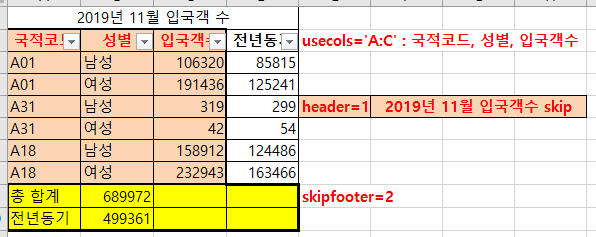

In [7]:
sample_1.tail(3)

,국적코드,성별,입국객수
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [8]:
# sammple_1 데이터 정보 살펴보기
sample_1.info()

# <class 'pandas.core.frame.DataFrame'>: 데이터는 pandas의 데이터프레임 클래스
# RangeIndex: 6 entries, 0 to 5: 6로우로 구성(A01, A01, A31, A31, A18, A18)
# Data columns (total 3 columns): 총 3개의 칼럼을 가지고 있다.(국적코드, 성별, 입국객수)
# 0   국적코드    6 non-null      object: 국적코드 칼럼은 빈칸이 없이(non-null) 6개의 로우로 구성돼 있고, 문자 속성(object)변수
# 2   입국객수    6 non-null      int64 : 입국객수 칼럼은 빈 칸이 없이 6개의 로우로 구성된 정수형 속성(int64) 변수다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [9]:
# sample_1 데이터의 기초 통계량 확인
sample_1.describe()
# describe(): 숫자형 변수에 대한 여러가지 통계량을 출력하는 함수.

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


**데이터 선택**

In [10]:
# 칼럼 기준
# 데이터를 잘 불러왔으니 데이터에서 여러분이 원하는 부분만 선택하는 방법을 알아보겠습니다.
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [12]:
# 한 개의 칼럼 선택
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [13]:
# 칼럼 생성
sample_1['기준년월']='2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [14]:
# 로우(row) 기준
# 일반적으로 로우를 선택하는 경우는 특정 조건에 맞는 데이터를 필터링(filtering)한 결과를 찾을 때입니다.
condition=(sample_1['성별']=='남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [15]:
# 필터링 실습2
sample_1[condition]
# index 번호가 0,2,4에 해당하는 데이터만 출력

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [16]:
# 입국객수가 150,000명 이상인 경우만 찾아보겠습니다.
condition=(sample_1['입국객수']>=150000)
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [17]:
# 조건이 여러 개인 경우: 성별이 남성이면서, 입국객수가 150,000명이상인 경우
conditons=(sample_1['입국객수']>=150000)&(sample_1['성별']=='남성')
sample_1[conditons]

# 가독성 높게 표현하기: 역슬래시(\)기호는 코드가 길어서 한 줄 아래에 이어서 작성할 테니
# 두 줄을 한줄로 인식하라는 의미.

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [18]:
# 한 칼럼에 대해 여러 조건으로 필터링하기: OR(|)
condition=(sample_1['국적코드']=='A01')\
|(sample_1['국적코드']=='A18')
sample_1[condition]

# 여러 조건 중 한 가지 이상만 만족해도 되는 경우에는 OR 기호를 사용합니다.

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [19]:
# 한 칼럼에 대해 여러 조건으로 필터링하기: isin
conditions=(sample_1['국적코드'].isin(['A01','A18']))
sample_1[conditions]

# isin()함수: 안에 찾고 싶은 값들을 리스트 형태로 넣으면, 리스트 안의 값에 해당할 경우
# True값을 반환합니다.

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [20]:
sample_1[conditions==False]
# 조건에 해당하지 않는 경우를 찾을 때

,국적코드,성별,입국객수,기준년월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


**데이터 통합**

In [21]:
# 데이터 통합: 옆으로 통합(merge)
sample_1

# 국적코드와 국적명을 매핑(mapping)해 놓은 국적 코드표를 통해 국적코드에 해당하는
# 국적명을 추가한 후 데이터 분석을 진행합니다.

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


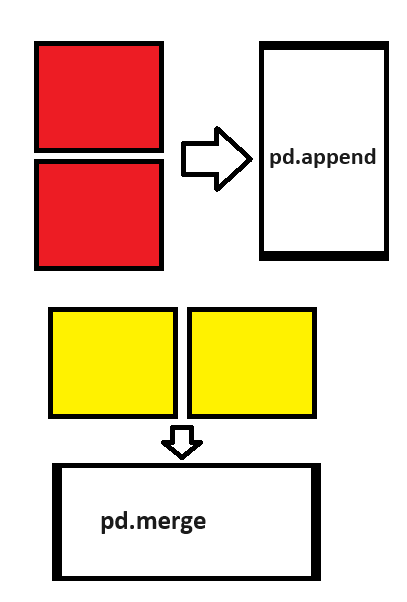

In [42]:
code_master=pd.read_excel('/content/sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [52]:
sample_1_code=pd.merge(left=sample_1,right=code_master,how='left',left_on='국적코드',right_on='국적코드')
sample_1_code

# left= sample_1: 왼쪽 테이블은 sample_1로 설정.
# how='left': 왼쪽 테이블을 기준으로 두 테이블을 결합하겠다.
# left_on='국적코드': 왼쪽 테이블의 기준 칼럼은 국적코드다.
# right_on='국적코드': 오른쪽 테이블의 기준 칼럼은 국적코드다.

# how='left'라는 인자를 지정하고 왼쪽 테이블을 기준으로 통합했기 때문에,
# code_master의 국적코드에 매칭되는 값(A31)이 없는 경우에는 NaN으로 결과가 출력됩니다.

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [44]:
sample_1_code=pd.merge(left=sample_1,right=code_master,how='inner',left_on='국적코드',right_on='국적코드')
sample_1_code

# how='inner': 양쪽 테이블에서 공통으로 존재하는 경우에 대해 출력하고 싶다면 다음과 같이 나타낼 수 있습니다.
# 두 테이블의 기준 칼럼의 값이 서로 일치하는 경우에만 데이터를 통합하는 옵션.
# 실제 업무를 할 때는 왜 이런 일이 발생했는지 파악한 후, 데이터를 사용할지, 사용하지 않을지 결정해야 합니다.

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [53]:
# 데이터 통합: 아래로 통합(append)
# 수년 치 데이터를 통합하기 위해 모든 엑셀 파일을 열어 하나씩 복사하고 아래로 붙여넣기 반복 작업을 해본 경험이 한 번쯤 있으리라 생각합니다.
sample_2=pd.read_excel('/content/sample_2.xlsx',header=1,skipfooter=2,usecols='A:C')
sample_2

,국적코드,성별,입국객수
0,A01,남성,92556
1,A01,여성,163737
2,A18,남성,155540
3,A18,여성,249023


In [54]:
sample_2['기준년월']='2019-12'
sample_2

,국적코드,성별,입국객수,기준년월
0,A01,남성,92556,2019-12
1,A01,여성,163737,2019-12
2,A18,남성,155540,2019-12
3,A18,여성,249023,2019-12


In [46]:
code_master=pd.read_excel('/content/sample_codemaster.xlsx')
sample_2_code=pd.merge(left=sample_2,right=code_master,how='left',left_on='국적코드',right_on='국적코드')
sample_2_code
# 데이터를 아래로 통합하기 위해서는 칼럼 순서가 동일해야 합니다.

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [55]:
print('type(sample_1_code)값:',type(sample_1_code))
print('type(sample_2_code)값:',type(sample_2_code))

type(sample_1_code)값: <class 'pandas.core.frame.DataFrame'>
type(sample_2_code)값: <class 'pandas.core.frame.DataFrame'>


In [56]:
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [57]:
import pandas as pd
new=pd.DataFrame(sample_2_code)

sample=pd.concat([sample_1_code, sample_2_code],ignore_index=True)
sample

# pandas 버전 문제로 인해, pd.concat 사용
# ignore_index=True: 지정하지 않으면 원래 각 데이터에서의 인덱스 값으로 합쳐진다.

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


**데이터 저장(to_excel)**

In [58]:
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [59]:
# sample 데이터를 엑셀파일로 저장
sample.to_excel('sampe.xlsx')

In [60]:
sample.to_excel('sampe1.xlsx',index=False)
# 엑셀 파일로 저장할 때, index 번호를 제외하고 저장.

**데이터 집계(pivot_table)**

In [61]:
# 피벗테이블: 기존 데이터의 칼럼을 재구성해서, 데이터에 대한 통계를 한눈에 파악할 수 있게 정리한 표.
# 피벗 기능을 이용하면 데이터를 원하는 형태로 손쉽게 집계할 수 있습니다.
sample_pivot=sample.pivot_table(values='입국객수', index='국적명', columns='기준년월',aggfunc='mean')

sample_pivot
# 국적과 기준년월에 따른 입국객수의 평균값(mean)을 추출하는 예제

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


In [62]:
sample_pivot_2=sample.pivot_table(values='입국객수',index='국적명',aggfunc='max')
sample_pivot_2

,입국객수
국적명,
일본,191436
중국,249023


In [63]:
sample_pivot_2=sample.pivot_table(values='입국객수',index='국적명',aggfunc='mean')
sample_pivot_2

# 피벗 테이블을 사용할 때 중요한 것은 기존 칼럼들을 피벗 테이블의 어떤 영역에 배치할 것인지를 판단하는 일입니다.

,입국객수
국적명,
일본,138512.25
중국,199104.50
